In [1]:
!wget https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip

--2024-10-26 17:09:25--  https://hydranets-data.s3.eu-west-3.amazonaws.com/UTKFace.zip
Resolving hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)... 52.95.154.32, 3.5.225.173
Connecting to hydranets-data.s3.eu-west-3.amazonaws.com (hydranets-data.s3.eu-west-3.amazonaws.com)|52.95.154.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131852014 (126M) [application/zip]
Saving to: ‘UTKFace.zip’

UTKFace.zip         100%[===================>] 125.74M  29.5MB/s    in 4.9s    

2024-10-26 17:09:31 (25.5 MB/s) - ‘UTKFace.zip’ saved [131852014/131852014]



In [2]:
!jar xf UTKFace.zip

In [3]:
!ls

__MACOSX  sample_data  trump_mcdonalds.webm  UTKFace  UTKFace.zip


In [4]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=945f702a42c4568781b080d9f1b471afa1a9eb5a740f8825d2d94acf8c7b7fb3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [5]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [6]:
# exit()

In [7]:
from deepface import DeepFace

24-10-26 17:10:29 - Directory /root/.deepface has been created
24-10-26 17:10:29 - Directory /root/.deepface/weights has been created


In [8]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import glob
import os

In [9]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"))
print(image_paths[0])

UTKFace/100_0_0_20170112213500903.jpg.chip.jpg


In [10]:
image_paths = sorted(glob.glob("UTKFace/*.jpg.chip.jpg"), key=lambda x: int(x[8:].split("_")[0]))
image_paths = image_paths[len(image_paths)//2:] # testing middle-aged individuals

images = []
ages = []
genders = []
races = []

for path in image_paths:
    filename = path[8:].split("_")
    if len(filename)==4:
        images.append(np.array(Image.open(path)))
        ages.append(int(filename[0]))
        genders.append(int(filename[1]))
        races.append(int(filename[2]))

In [11]:
dataset_dict = {
    'race_id': {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Other'
    },
    'gender_id': { 0: 'Male', 1: 'Female'
    }
}

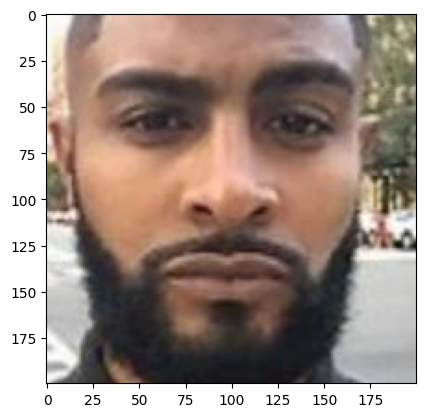

Age: 29
Gender: Male
Race: Black


In [12]:
idx = np.random.randint(len(images))
idx = 0
plt.imshow(images[idx])
plt.show()

print("Age: "+str(ages[idx]))
print("Gender: "+str(dataset_dict['gender_id'][genders[idx]]))
print("Race: "+str(dataset_dict['race_id'][races[idx]]))

In [13]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
  "GhostFaceNet",
]

Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


old failure image, it incorrectly predicted 24 when it actually was 29.


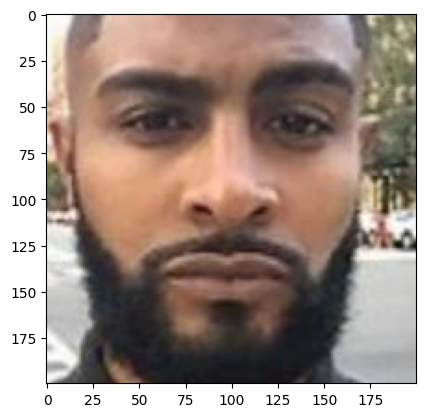

Age prediction and image process failure count:  False 0


0.0

In [15]:
def test_model_accuracy(images):
  bool_array = []
  skipped_count = 0
  for idx, image in enumerate(images):
    try:
      objs = DeepFace.analyze(
        img_path = image_paths[idx],
        actions = ['age', 'gender'],
        detector_backend = 'mediapipe',
      )
    except Exception as e:
      print(e)
      skipped_count += 1
      continue

    result = False
    if ages[idx] >= 25:
      if (int(objs[0]['age']) >= 25):
        result = True
      else:
        result = False
        print(f'old failure image, it incorrectly predicted {int(objs[0]["age"])} when it actually was {ages[idx]}.')
        plt.imshow(images[idx])
        plt.show()
    else:
      if (int(objs[0]['age']) < 25):
        result = True
      else:
        result = False
        print(f'young failure image, it incorrectly predicted {int(objs[0]["age"])} when it actually was {ages[idx]}.')
        plt.imshow(images[idx])
        plt.show()
    bool_array.append(result)
    print("Age prediction and image process failure count: ", result, skipped_count)
    break


  accuracy = np.sum(bool_array) / (len(bool_array) - skipped_count)
  return accuracy

test_model_accuracy(images)

In [16]:
pip install opencv-python opencv-python-headless torch torchvision

In [17]:
import cv2
import torch
import numpy as np
from deepface import DeepFace
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from IPython.display import clear_output

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


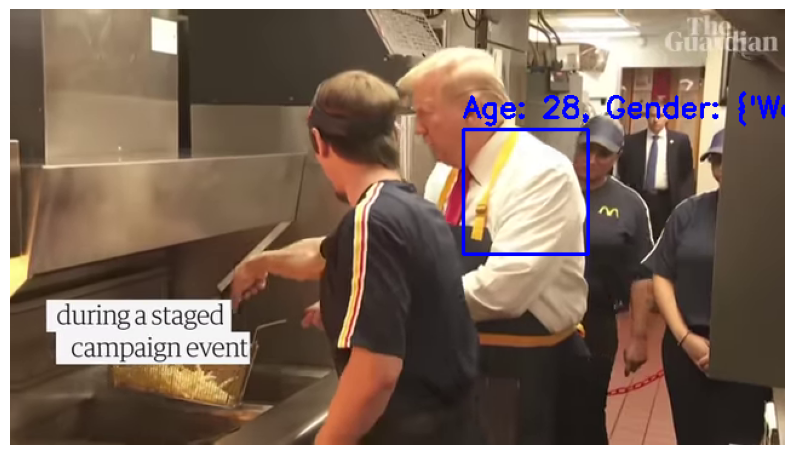

Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


26 {'Woman': 10.84722951054573, 'Man': 89.15277123451233}


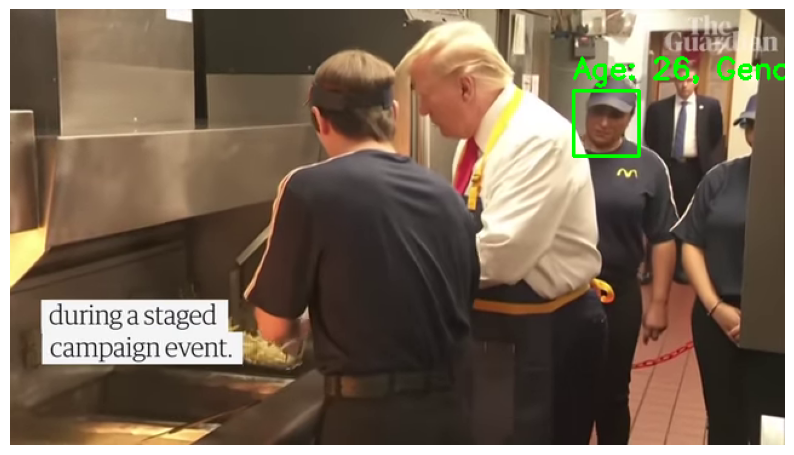

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


26 {'Woman': 12.351766973733902, 'Man': 87.64823079109192}


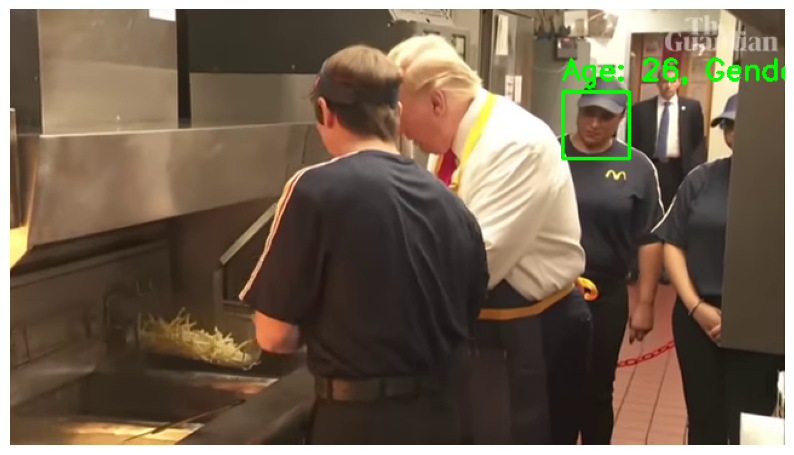

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


26 {'Woman': 6.852744519710541, 'Man': 93.14725399017334}


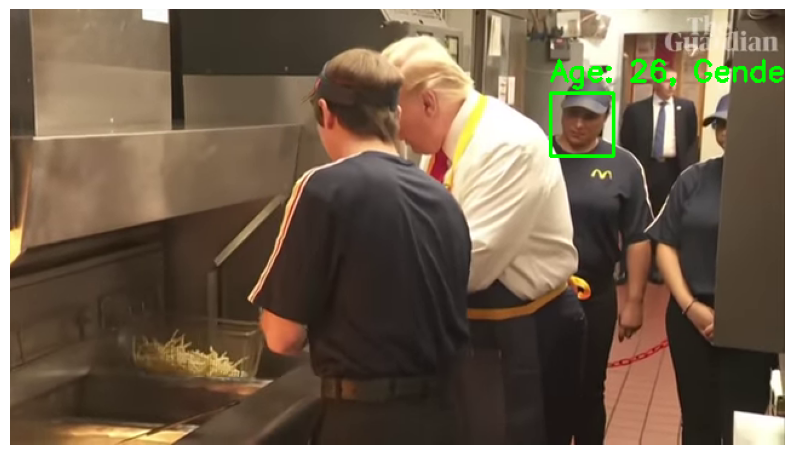

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


26 {'Woman': 9.53434705734253, 'Man': 90.46565890312195}


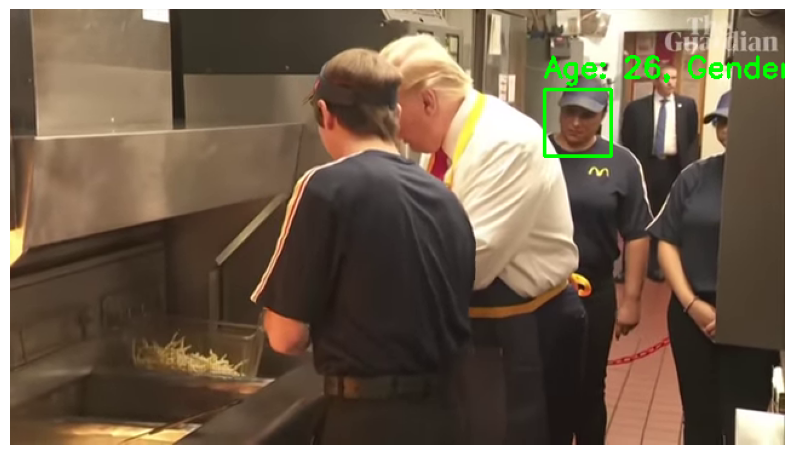

Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


26 {'Woman': 9.439211338758469, 'Man': 90.56078791618347}


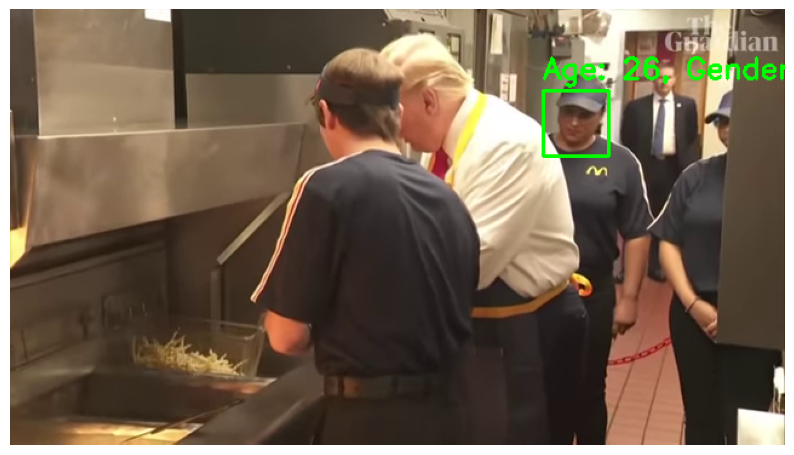

Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


29 {'Woman': 6.0398392379283905, 'Man': 93.96016001701355}


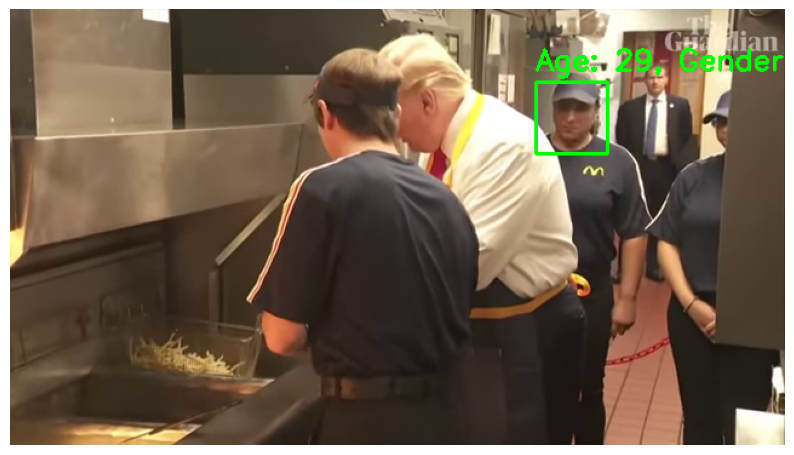

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


25 {'Woman': 38.20287585258484, 'Man': 61.797118186950684}


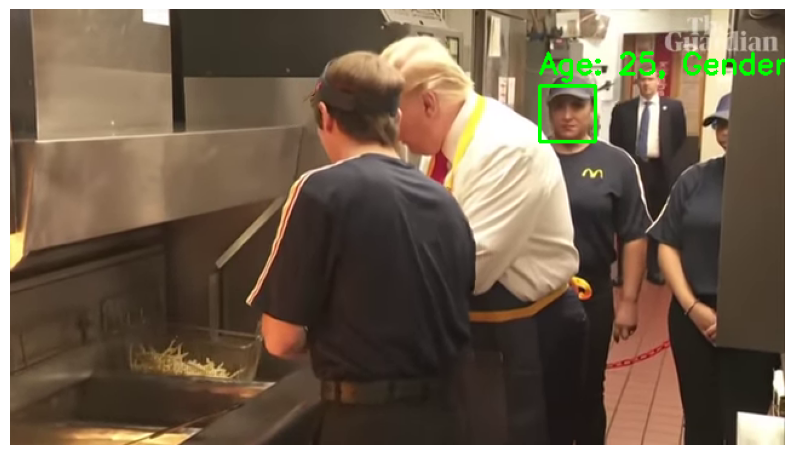

KeyboardInterrupt: 

In [21]:
video_path = 'trump_mcdonalds.webm'  # Using 480p version to emulate low quality
frame_interval = 5  # Check every 5th frame

cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Variables for reference image and tracking
reference_face = None
reference_face_found = False
frame_count = 0  # To track the frame number
frames_tracked = 0  # Number of tracked frames

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process every nth frame
    if frame_count % frame_interval == 0:
        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=4)

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]

            if not reference_face_found:
                try:
                    # Analyze the face to extract age and gender
                    analysis_result = DeepFace.analyze(
                        img_path=face, actions=['age', 'gender'], detector_backend='mediapipe', enforce_detection=False
                    )

                    reference_face = face
                    reference_face_found = True
                    predicted_age = int(analysis_result[0]["age"])
                    predicted_gender = analysis_result[0]["gender"]

                    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
                    cv2.putText(frame, f"Age: {predicted_age}, Gender: {predicted_gender}", (x, y - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(frame_rgb)
                    plt.axis('off')
                    plt.show()

                except Exception as e:
                    print(f"Error analyzing face: {e}")
                    continue

            else:
                try:
                    verification_result = DeepFace.verify(face, reference_face, model_name='VGG-Face', enforce_detection=False)

                    if verification_result["verified"]:
                        analysis_result = DeepFace.analyze(
                            img_path=face, actions=['age', 'gender'], detector_backend='mediapipe', enforce_detection=False
                        )
                        predicted_age = int(analysis_result[0]["age"])
                        predicted_gender = analysis_result[0]["gender"]
                        print(predicted_age, predicted_gender)

                        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                        cv2.putText(frame, f"Age: {predicted_age}, Gender: {predicted_gender}", (x, y - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

                        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        plt.figure(figsize=(10, 6))
                        plt.imshow(frame_rgb)
                        plt.axis('off')
                        plt.show()

                        frames_tracked += 1
                        if frames_tracked > 3:
                            break

                except Exception as e:
                    print(f"Error verifying face: {e}")
                    continue

    frame_count += 1

cap.release()